![image.png](attachment:image.png)

![image.png](attachment:image.png)

## NLP with DL

## Import libraries

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer    # Tensorflow un Tokenizer fonksiyonu
from tensorflow.keras.preprocessing.sequence import pad_sequences    # modele vereceğimiz squence lerin aynı boyutta olmasını sağlıyor.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')

In [ ]:
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


NLP de Missing Value yu doldurma şekli bulunmamaktadır. Veriyi çoğaltma teknikleri bulunmaktadır.

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.rename(columns={"Review Text": "review_text",'Rating':'rating','Title':'title', 'Recommended IND':'recommended'},inplace=True)

In [ ]:
df[['title','review_text','rating']].fillna('',inplace=True)
df['comment'] = df['title'].astype(str) + ' ' + df['review_text'].astype(str)
df.head()

,Clothing ID,Age,title,review_text,rating,recommended,Positive Feedback Count,Division Name,Department Name,Class Name,comment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,nan Absolutely wonderful - silky and sexy and ...
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,nan Love this dress! it's sooo pretty. i hap...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


In [ ]:
def get_missing_values(df):
    df_missing = pd.DataFrame(100 * df.isnull().sum() / len(df), columns=['per_missing'])
    df_missing['total'] = df.isnull().sum()
    df_missing.sort_values(by='per_missing', ascending=False, inplace=True)
    return df_missing

get_missing_values(df)


,per_missing,total
title,16.222430,3810
review_text,3.597888,845
Division Name,0.059610,14
Department Name,0.059610,14
Class Name,0.059610,14
Clothing ID,0.000000,0
Age,0.000000,0
rating,0.000000,0
recommended,0.000000,0
Positive Feedback Count,0.000000,0


In [ ]:
df[df["title"].isnull()]

,Clothing ID,Age,title,review_text,rating,recommended,Positive Feedback Count,Division Name,Department Name,Class Name,comment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,nan Absolutely wonderful - silky and sexy and ...
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,nan Love this dress! it's sooo pretty. i hap...
11,1095,39,NaN,This dress is perfection! so pretty and flatte...,5,1,2,General Petite,Dresses,Dresses,nan This dress is perfection! so pretty and fl...
30,1060,33,NaN,Beautifully made pants and on trend with the f...,5,1,0,General Petite,Bottoms,Pants,nan Beautifully made pants and on trend with t...
36,1002,29,NaN,This is a comfortable skirt that can span seas...,4,1,5,General,Bottoms,Skirts,nan This is a comfortable skirt that can span ...
...,...,...,...,...,...,...,...,...,...,...,...
23450,964,40,NaN,I wanted to love this jacket. so soft and grea...,3,0,4,General,Jackets,Jackets,nan I wanted to love this jacket. so soft and ...
23453,1104,39,NaN,"I am 5' 2"" about 118 lbs. thought this fit rea...",4,1,0,General Petite,Dresses,Dresses,"nan I am 5' 2"" about 118 lbs. thought this fit..."
23458,862,63,NaN,This is my new favorite sweater. it is lightwe...,5,1,0,General Petite,Tops,Knits,nan This is my new favorite sweater. it is lig...
23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses,nan nan


In [ ]:
df[df["comment"]=="nan nan"]

,Clothing ID,Age,title,review_text,rating,recommended,Positive Feedback Count,Division Name,Department Name,Class Name,comment
92,861,23,NaN,NaN,5,1,0,General Petite,Tops,Knits,nan nan
93,1081,31,NaN,NaN,5,1,0,General,Dresses,Dresses,nan nan
98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outerwear,nan nan
135,861,35,NaN,NaN,4,1,0,General Petite,Tops,Knits,nan nan
142,1126,35,NaN,NaN,5,1,0,General,Jackets,Outerwear,nan nan
...,...,...,...,...,...,...,...,...,...,...,...
23258,862,35,NaN,NaN,4,1,0,General,Tops,Knits,nan nan
23301,862,52,NaN,NaN,5,1,0,General,Tops,Knits,nan nan
23303,823,46,NaN,NaN,5,1,0,General,Tops,Blouses,nan nan
23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses,nan nan


In [ ]:
df = df[df["comment"] != "nan nan"]

In [ ]:
df.isnull().sum()

Clothing ID                   0
Age                           0
title                      2966
review_text                   1
rating                        0
recommended                   0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
comment                       0
dtype: int64

In [ ]:
df.drop(columns=['Age', 'Clothing ID',  'Positive Feedback Count', 'Division Name','Class Name','Department Name', 'review_text','title'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22642 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rating       22642 non-null  int64 
 1   recommended  22642 non-null  int64 
 2   comment      22642 non-null  object
dtypes: int64(2), object(1)
memory usage: 707.6+ KB


In [ ]:
df.head()

,rating,recommended,comment
0,4,1,nan Absolutely wonderful - silky and sexy and ...
1,5,1,nan Love this dress! it's sooo pretty. i hap...
2,3,0,Some major design flaws I had such high hopes ...
3,5,1,"My favorite buy! I love, love, love this jumps..."
4,5,1,Flattering shirt This shirt is very flattering...


In [ ]:
df['comment'] = df['comment'].str.replace('nan', '')

In [ ]:
df.head()

,rating,recommended,comment
0,4,1,Absolutely wonderful - silky and sexy and com...
1,5,1,Love this dress! it's sooo pretty. i happen...
2,3,0,Some major design flaws I had such high hopes ...
3,5,1,"My favorite buy! I love, love, love this jumps..."
4,5,1,Flattering shirt This shirt is very flattering...


In [ ]:
df.recommended.value_counts()

1    18541
0     4101
Name: recommended, dtype: int64

Burada 1 olumlu iken 0 olumsuz yorumları ifade etmektedir.
Hedef Label ın 1 olması daha doğru bir yaklaşımdır.
Model.fit olarak çalışmaya başladığı zaman Val_recal ve recall değerleri her zaman 1 i takip ederler.

Bu kod, bir Pandas DataFrame'deki "Rating" sütununu dönüştürmek için kullanılır. Verilen kod satırı, "Rating" sütunundaki değerleri belirli bir eşleme mantığına göre değiştirir. Eşleme mantığına göre, 1 olan değerler 0'a dönüştürülür ve 0 olan değerler 1'e dönüştürülür. Bu tür bir dönüşüm, verileri farklı bir format veya kodlama ile uyumlu hale getirmek veya belirli bir analiz veya işlem için özel bir işaretleme yapmak için kullanılabilir. Bu durumda, 1 ve 0 değerleri arasında bir dönüşüm gerçekleşmektedir.

In [ ]:
df.rating.value_counts()

5    12541
4     4908
3     2823
2     1549
1      821
Name: rating, dtype: int64

In [ ]:
pd.Series(df.recommended).value_counts(normalize=True)

1    0.818876
0    0.181124
Name: recommended, dtype: float64

Bu kod satırı, bir Pandas DataFrame'deki "Rating" sütunundaki değerlerin sıklığını normalize ederek gösterir. Bu kodun her adımını açıklayalım:

df.Rating: DataFrame içindeki "Rating" sütununu seçer.

pd.Series(...): Seçilen sütunu bir Pandas Serisi'ne dönüştürür. Bu, Seri üzerinde çeşitli işlemleri gerçekleştirmenizi sağlar.

value_counts(): Bu metod, Seri içindeki benzersiz değerlerin sayısını ve her bir değerin sıklığını hesaplar. Yani, "Rating" sütunundaki her benzersiz değerin kaç kez tekrarlandığını sayar.

normalize=True: Bu parametre, sonuçların normalize edilmesini sağlar. Yani, her bir değerin toplam sayıya oranı hesaplanır. Sonuç, yüzde cinsinden ifade edilir.

Sonuç olarak, bu kod satırı size "Rating" sütunundaki her benzersiz değerin yüzdelik sıklığını verir. Bu, veri dağılımını analiz etmek ve sütundaki değerlerin oranlarını anlamak için kullanışlı bir bilgi sağlar.

normalize=True: value_counts() fonksiyonuna normalize=True parametresi verilir. Bu, sonuçların yüzdelik cinsinden normalize edilmesini sağlar. Her bir değerin toplam değerlere oranı olarak ifade edilir.

ÇOK DENGESİZ BİR DATA SETİ

![image.png](attachment:image.png)

## Tokenization

In [ ]:
X = df['comment'].values    # Deep Learning de datayı arraya çevirmek için .values ekliyoruz.
y = df['recommended'].values

![image.png](attachment:image.png)

Bu şekilde, DataFrame verileri NumPy array'ine dönüştürülerek, derin öğrenme modeline giriş olarak kullanılabilir.

In [ ]:
num_words= 15000   # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız.

15000'den fazla seçmek maliyetli ve 1 defa geçen kelimeden model de iyi öğrenemez

In [ ]:
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'
# None değeri atanırsa tüm kelimeler dikkate alınır.

![image.png](attachment:image.png)

num_words parametresini kullanmak, yalnızca belirli bir sayıda en yaygın kullanılan kelimenin Tokenizer tarafından tanınmasını ve diğerlerinin göz ardı edilmesini sağlar. Bu, bellek kullanımını kontrol altına alır ve modelin daha fazla anlamlı bilgiye odaklanmasını sağlar. Bu nedenle, büyük veri kümesiyle çalışırken veya bellek sınırlamalarıyla karşılaşırken num_words parametresini kullanmak faydalı olabilir.

Burada Tokenizer sınıfını kullanarak bir metin verisini işleyecek bir tokenizer nesnesi oluşturuyorsunuz. num_words parametresi, kaç kelimeyi göz önünde bulunduracağınızı belirlemek için kullanılır.

Tokenizer sınıfı, metin verilerini sayılara dönüştürmek ve daha sonra bu sayıları modelin girdisi olarak kullanmak için kullanılır. num_words parametresi, en sık kullanılan kelimelerin sayısını sınırlamaya yardımcı olur. Yani, num_words değeri kadar en sık kullanılan kelimeleri seçer ve diğer kelimeleri göz ardı eder.

Örneğin, num_words=15000 olarak ayarladığınızda, tokenizer en sık kullanılan 15,000 kelimeyi dikkate alacak ve geri kalan kelimeleri görmezden gelecektir. Bu, daha fazla kelimenin işlenmesi ve gereksiz bilginin tutulmasının önlenmesi açısından faydalı olabilir, özellikle büyük bir sözcük dağarcığına sahipseniz.

SADECE İLK 15.000 E TOKENIZER İŞLEMİ YAPILMIŞ OLUYOR..

![image.png](attachment:image.png)

In [ ]:
X

array([' Absolutely wonderful - silky and sexy and comfortable',
       ' Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'Some major design flaws I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "Cute, but see through This fit well, but the top was very see

In [ ]:
  # Tensorflow un kendisinin geliştirdiği Tokenizer fonksiyonu... #otomatik olarak lower yapıyor..
tokenizer.fit_on_texts(X)

Deep learning de lemmatization ve stemming yapılmıyor !
Bütün data cleaning islemlerini model kendisi yapıyor.

![image.png](attachment:image.png)

![image.png](attachment:image.png)

## Creating word index

EN ÇOK KULLANILANLARI EN ÇOK KULLANIM SIKLIĞINA GÖRE SIRALAMAYA SOKUYOR.

In [ ]:
tokenizer.word_index.items()

dict_items([('the', 1), ('i', 2), ('and', 3), ('a', 4), ('it', 5), ('is', 6), ('this', 7), ('to', 8), ('in', 9), ('but', 10), ('on', 11), ('for', 12), ('of', 13), ('with', 14), ('so', 15), ('was', 16), ('dress', 17), ('my', 18), ('love', 19), ('not', 20), ('that', 21), ('size', 22), ('very', 23), ('top', 24), ('have', 25), ('fit', 26), ('great', 27), ('like', 28), ('are', 29), ('be', 30), ('me', 31), ('as', 32), ('wear', 33), ('too', 34), ("it's", 35), ('or', 36), ("i'm", 37), ('just', 38), ('am', 39), ('you', 40), ('fabric', 41), ('small', 42), ('would', 43), ('they', 44), ('up', 45), ('color', 46), ('at', 47), ('cute', 48), ('perfect', 49), ('beautiful', 50), ('look', 51), ('if', 52), ('really', 53), ('more', 54), ('flattering', 55), ('little', 56), ('ordered', 57), ('these', 58), ('soft', 59), ('one', 60), ('will', 61), ('nice', 62), ('comfortable', 63), ('well', 64), ('an', 65), ('out', 66), ('back', 67), ('had', 68), ('can', 69), ('because', 70), ('shirt', 71), ('than', 72), ('lar

tokenizer.fit_on_texts(X) ve tokenizer.texts_to_sequences(X) iki farklı işlemi temsil eder ve farklı amaçlar taşır:

tokenizer.fit_on_texts(X):

Bu işlem, verilen metin verisi (X) üzerinden çalışır ve Tokenizer'ın içsel sözcük indekslerini oluşturur.
Her kelimenin bir sayı ile eşleştirildiği bir sözlük oluşturur. Bu sözlük, metindeki her benzersiz kelimenin sayısal bir indeksi ile ilişkilendirilmesini sağlar.
Bu işlem, Tokenizer'ın metindeki kelimeleri sayısal dizilere dönüştürmek için hangi indeksleri kullanacağını belirler.
Genellikle, eğitim verisi üzerinde yapılır ve eğitim verisi içindeki tüm benzersiz kelimelerin Tokenizer tarafından tanınmasını sağlar.
tokenizer.texts_to_sequences(X):

Bu işlem, Tokenizer tarafından tanınan kelimeleri kullanarak verilen metin verisini sayısal dizilere dönüştürür.
fit_on_texts(X) işlemi tamamlandıktan sonra kullanılabilir çünkü Tokenizer artık metindeki kelimeleri anlar.
Her kelimeyi ilgili sayısal indeksiyle değiştirir ve her cümleyi veya metni sayısal dizilere dönüştürür.
Bu işlem, metin verisini makine öğrenimi modellerine veya derin öğrenme modellerine beslemek için kullanılır.
Özetle, fit_on_texts(X) Tokenizer'ın metindeki kelimeleri anlamasını sağlar, texts_to_sequences(X) ise Tokenizer tarafından tanınan kelimeleri kullanarak metin verisini sayısal dizilere dönüştürür. İkinci adımı gerçekleştirebilmek için önce birinci adımı tamamlamak gerekmektedir.







## Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)   # TEXT IMI TOKENIZE IŞLEMİNE TABİ TUT.

tokenizer.texts_to_sequences(X) kod satırı, bir metin verisini sayısal dizilere dönüştürmek için kullanılır. İşte bu kod satırının ne yaptığını adım adım açıklayalım:

tokenizer: Önceden tanımlanmış bir Tokenizer nesnesi. Bu nesne, metin verisini dönüştürmek için kullanılan Tokenizer'dır.

X: Dönüştürülmek istenen metin verisi. Bu metin verisi, bir liste veya bir dizi içinde bulunmalıdır. Her bir öğe, bir metin belgesini veya cümleyi temsil eder.

tokenizer.texts_to_sequences(X): Bu metod, Tokenizer nesnesini kullanarak metin verisini sayısal dizilere dönüştürür. Her kelimenin veya tokenin (metindeki her bir öğenin) bir sayı ile temsil edildiği bir dizi oluşturur. Her kelime, bu dizide belirli bir sayısal değere sahiptir. Bu, metin verisini sayısal olarak temsil etmek için kullanışlıdır ve genellikle makine öğrenimi modellerine beslemek için gereklidir.

In [ ]:
#X_num_tokens

In [ ]:
# 105. index comment
X[105]

'Perfect fall shirt! The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [ ]:
# 105. index token numbers
print(X_num_tokens[105])  # burda sayı olarak tokenlere ayırıyor. ama her kelimenin sayısı yok ilk 15bin aldığımız için

[49, 153, 71, 1, 71, 6, 480, 32, 5, 6, 358, 2, 25, 1, 1949, 493, 46, 3, 19, 5, 2, 251, 2241, 212, 199, 587, 14, 89, 3, 896, 326, 4, 209, 100, 5, 82, 132, 8, 22, 32, 2, 248, 33, 4, 42, 9, 76, 106, 149, 5, 6, 1, 2939, 80, 148, 9, 1, 203, 2, 43, 338, 7, 24, 4, 278, 278]


In [ ]:
#return index 1 matching word
reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}
word = reverse_word_index[1]
print(word)


the


In [ ]:

reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}
word = reverse_word_index[1816]
print(word)

elegance


In [ ]:
len(X_num_tokens[105])

66

In [ ]:
len(X_num_tokens[106])

7

In [ ]:
len(X_num_tokens[6150])

13

BÜTÜN YORUMLARDAKİ TOKENLERİN SAYISINI TESPİT ETMEK İÇİN:

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens] # X_num_tokens deki (yorumlardaki) her bir tokeni al ve say...
num_tokens = np.array(num_tokens)   # mean, max etc gibi işlemleri daha rahat yapabilmek için array a çevirdik.

Bu kod, bir metin veri kümesindeki her bir örneğin kelime sayısını hesaplamak için bir döngü kullanır ve ardından elde edilen sayıları bir NumPy dizisine dönüştürür.

İşlevin adımları aşağıdaki şekildedir:

num_tokens = [len(tokens) for tokens in X_num_tokens]: Bu döngü, X_num_tokens listesindeki her bir tokens öğesi için, len(tokens) ifadesini kullanarak o örnekteki kelime sayısını hesaplar. X_num_tokens bir liste olduğunu varsayalım ve her bir öğe bir metin belgesini tokenlara bölen bir işlem tarafından dönüştürülmüş bir token dizisidir.

num_tokens = np.array(num_tokens): Hesaplanan kelime sayılarını içeren num_tokens listesini bir NumPy dizisine dönüştürmek için np.array() fonksiyonunu kullanır. Bu, sayıları daha kolay işlemek ve analiz etmek için NumPy'nin sunduğu işlevleri kullanabilmemizi sağlar.

Sonuç olarak, bu kod parçası, metin veri kümesindeki her bir örneğin kelime sayısını hesaplar ve bu sayıları bir NumPy dizisine dönüştürür. Bu, örneklere ilişkin kelime sayılarını analiz etmek ve istatistiksel bilgileri hesaplamak için kullanılabilir.

In [ ]:
num_tokens

array([  7,  62, 101, ...,  46,  94,  24])

In [ ]:
random_sample = np.random.choice(num_tokens)

print(random_sample)

85


In [ ]:
len(num_tokens)

22642

## Maximum number of tokens for all documents

In [ ]:
num_tokens.mean()

63.49421429202367

In [ ]:
num_tokens.max()

119

In [ ]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

6461

In [ ]:
X[6461]

"Odd fit, beautiful design but poor execution I wanted to love this blouse so much. but try as i might, it just fit so oddly on me. i'm usually a petite s so i purchased the xs in brown. first. the color was more gray-brown but it was still ok. but second, the fit was off. maybe i just got a bad one, but the center of the blouse was so offset, that the slit in the front laid so far to the left and the v-neck was so low that you could see my bra - there was no adjusting i could do to fix it. the material has a lovely soft silky feel to it an"

In [ ]:
len(X_num_tokens[6461])

119

In [ ]:
list = [5, 10, 8, 9, 12, 15]
print(np.array(list) < 10)
print(sum(np.array(list) < 10))    # 5,8,9 toplamda 3 tane
print(sum(np.array(list) < 10)/len(list))   # 3 / 6 = 0.5

[ True False  True  True False False]
3
0.5


In [ ]:
max_tokens = 107

In [ ]:
sum(num_tokens < max_tokens) / len(num_tokens)  # it covers 95% of the comments

0.9565409416129317

In [ ]:
sum(num_tokens < max_tokens)

21658

In [ ]:
len(num_tokens)

22642

![image.png](attachment:image.png)

## Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)   # sabitleme

Bu kod, bir metin veri kümesindeki metin örneklerini bir dizi tokena göre belirli bir maksimum uzunluğa (max_tokens) kadar doldurur (pad) veya kırpır (truncate) işlemi yapar.

İşlevin adımları şu şekildedir:

X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens): pad_sequences fonksiyonu, X_num_tokens olarak verilen bir metin veri kümesindeki her bir örneği, maxlen parametresine belirtilen maksimum uzunluğa kadar doldurur veya kırparak bir dizi haline getirir.

X_num_tokens: Metin veri kümesindeki her bir örneğin token dizilerini içeren bir liste.
maxlen: Doldurma veya kırpmadan sonra hedeflenen maksimum token sayısı.
pad_sequences fonksiyonu, daha kısa olan token dizilerini baştan veya sondan sıfırlarla (0) doldurarak aynı uzunluğa getirir. Daha uzun olan token dizileri ise kırpılır, yani maksimum uzunluğa kadar kesilir.

X_pad: Doldurulmuş veya kırpılmış token dizilerini içeren bir NumPy dizisi olarak atanan değişken.

Sonuç olarak, bu kod, metin veri kümesindeki her bir örneği belirli bir maksimum token sayısına (max_tokens) göre doldurur veya kırparak yeni bir dizi oluşturur. Bu, metin verilerinin sabit bir uzunluğa sahip olmasını sağlar ve daha sonra makine öğrenmesi modellerine beslemek için kullanılabilir.

In [ ]:
X_pad.shape

(22642, 107)

In [ ]:
np.array(X_num_tokens[800])

array([   5,    6,   15,  465,   10,  542,    3,   50,    2,   39,  393,
          3,  681, 1124,    3,  293,   42,   82,   31,  152])

In [ ]:
X_pad[800]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    5,
          6,   15,  465,   10,  542,    3,   50,    2,   39,  393,    3,
        681, 1124,    3,  293,   42,   82,   31,  152], dtype=int32)

In [ ]:
np.array(X_num_tokens[21941])

array([  84,   46,   10, 1115,    4,  245,    2,  987,  235,    7,    8,
          4,  835,  594,    3,    5,  568,   66,   27,   14,    4,   48,
        333,  155,    1,  493,   46,    6,   84,    3,  517,    3,    5,
          6,   63,    8,   33,    2,   28,    1,   88,   13,    5,    3,
          5,  777,   53,   64,   32,   40, 1219,    1, 1842,   29,   21,
          5, 1115,   53,  365,    2,  659,    4, 4277, 8554,   81,    5,
        491,    8, 2971,   66,    1, 1115,   10,    5,  130,   68,    4,
       1223,   51,    8,    5,   70,    2,  103,   13,  174,    1,  840,
         29,   32,    2,   96,   67,   45,  111, 1481,   79,   12,  299,
       1907, 1698,    1,  163,    3,   67,  131])

In [ ]:
X_pad[21941]   # UZUN OLANLARDA SON 65 İ ALIYOR..

array([   0,   84,   46,   10, 1115,    4,  245,    2,  987,  235,    7,
          8,    4,  835,  594,    3,    5,  568,   66,   27,   14,    4,
         48,  333,  155,    1,  493,   46,    6,   84,    3,  517,    3,
          5,    6,   63,    8,   33,    2,   28,    1,   88,   13,    5,
          3,    5,  777,   53,   64,   32,   40, 1219,    1, 1842,   29,
         21,    5, 1115,   53,  365,    2,  659,    4, 4277, 8554,   81,
          5,  491,    8, 2971,   66,    1, 1115,   10,    5,  130,   68,
          4, 1223,   51,    8,    5,   70,    2,  103,   13,  174,    1,
        840,   29,   32,    2,   96,   67,   45,  111, 1481,   79,   12,
        299, 1907, 1698,    1,  163,    3,   67,  131], dtype=int32)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=0)

## Modelling

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 200   # EMBEDDING SIZE İLE OYNAYARAK OVERFITTING E ENGEL OLABİLİRİZ.

In [ ]:
#pip install numpy==1.19.5   # bu aşamada problem yaşayanlar bunu kurabilir...

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
model.add (Embedding(input_dim=num_words,   # İLK 15.000 TOKENI AL..
                    output_dim=embedding_size,    # KAÇ BOYUTTA OLACAĞINI İFADE EDİYOR (50 BOYUT)
                    input_length=max_tokens))   # HER BİR YORUMUN UZUNLUĞU (107 TOKEN)

model.add(GRU(units=256, return_sequences=True))    # LSTM DE KULLANILABİLİR..    UNITS= VEKTÖRÜ 48 BOYUTA DÜŞÜRÜR
model.add(Dropout(0.2))         # RETURN SEQUENCE= TRUE OLDUĞU ZAMAN... BİR SONRAKİ HIDDEN LAYER A GÖNDERİLEN BİLGİLER TOPLU OLARAK AKTARILIR..

model.add(GRU(units=128, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))

model.add(Dense(1, activation='sigmoid'))

GloVe vektörlerini kullanarak bir Embedding katmanı oluşturmak istiyorsanız, öncelikle GloVe vektörlerini yüklemeniz ve ardından Embedding katmanını bu vektörlerle başlatmanız gerekecektir. İşte bu işlemi gerçekleştirmek için bir Jupyter Notebook örneği:

# GloVe vektörlerini yüklemek için Gensim kütüphanesini kullanabilirsiniz
from gensim.models import KeyedVectors

# GloVe vektörlerini yükleyin (örnek olarak 50 boyutlu bir vektör seti kullanıldı)
glove_model = KeyedVectors.load_word2vec_format('glove.6B.50d.txt', binary=False)

# GloVe vektörlerini kullanarak embedding matrix oluşturun
embedding_matrix = np.zeros((num_words, embedding_size))

for word, i in tokenizer.word_index.items():
    if i < num_words:
        if word in glove_model:
            embedding_matrix[i] = glove_model[word]

# Embedding katmanını oluşturun ve GloVe vektörlerini yükleyin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, GRU, Dense

# Model oluşturma
model = Sequential()

# GloVe embedding matrix'i kullanarak Embedding katmanını başlatın
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    weights=[embedding_matrix],
                    input_length=max_tokens,
                    trainable=False))  # GloVe vektörlerini eğitmek istemiyorsanız trainable=False yapabilirsiniz

model.add(Dropout(0.2))
model.add(GRU(units=48, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=12))
model.add(Dense(1, activation='sigmoid'))

# Modeli derleyin
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model özetini gösterin
model.summary()


![image.png](attachment:image.png)

In [ ]:
optimizer = Adam(learning_rate=0.01)    # OVERFITTING İÇİN DEĞİŞİKLİK YAPABİLİRİZ.

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 107, 200)          3000000   
                                                                 
 gru_3 (GRU)                 (None, 107, 256)          351744    
                                                                 
 dropout_2 (Dropout)         (None, 107, 256)          0         
                                                                 
 gru_4 (GRU)                 (None, 107, 128)          148224    
                                                                 
 dropout_3 (Dropout)         (None, 107, 128)          0         
                                                                 
 gru_5 (GRU)                 (None, 12)                5112      
                                                                 
 dense_1 (Dense)             (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max",   #mode= auto da trendi takip eder.
                           verbose=1, patience = 5, restore_best_weights=True)

mode: İzlenen metriğin maksimum veya minimum değerine karar vermek için kullanılır. "max" olarak ayarlandığında, monitör metriği maksimize edilmeye çalışılır (örneğin, doğrulama doğruluğu). "min" olarak ayarlandığında ise metrik minimize edilmeye çalışılır (örneğin, doğrulama kaybı).

In [ ]:
from sklearn.utils import class_weight     # DENGESİZ BİR DATA OLDUĞU İÇİN YENİ BİR AĞIRLANDIRMA YAPILIYOR.
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61060545, 2.7602865 ])

class_weight.compute_sample_weight fonksiyonu, dengesiz veri kümesi üzerinde sınıf ağırlıklarının hesaplanmasını sağlar. Bu işlev, veri kümesindeki sınıflar arasındaki dengesizliği ele almak için kullanılır. Her bir veri örneği için hesaplanan ağırlıklar, modelin nadir sınıfları daha fazla vurgulayarak doğruluk oranını artırmasına yardımcı olabilir.

Parametrelerin anlamları:

class_weight: Sınıf ağırlıklarının nasıl hesaplanacağını belirleyen bir parametre. "balanced" olarak ayarlandığında, sınıflar arasındaki dengesizliği otomatik olarak tespit ederek ağırlıkları hesaplar. Diğer bir seçenek, özel bir sözlük kullanarak sınıflara özel ağırlıklar belirtmektir.
y: Etiketlerin (hedef değişken) dizisi.
class_weight.compute_sample_weight işlevi, her bir veri noktası için hesaplanan sınıf ağırlıklarını döndürür. Bu ağırlıklar, sınıf etiketlerine bağlı olarak değişir ve dengesiz veri kümesinde nadir sınıflara daha büyük bir ağırlık verir.

pd.Series(classes_weights).unique() kodu, hesaplanan sınıf ağırlıklarını benzersiz değerler olarak döndürür. Bu, ağırlıkların farklı sınıflar için nasıl değiştiğini görmemizi sağlar.

https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=256, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
71/71 [==============================] - 201s 3s/step - loss: 0.2698 - recall: 0.8803 - val_loss: 0.2752 - val_recall: 0.8949
Epoch 2/10
71/71 [==============================] - 195s 3s/step - loss: 0.2462 - recall: 0.8871 - val_loss: 0.3212 - val_recall: 0.8598
Epoch 3/10
71/71 [==============================] - 207s 3s/step - loss: 0.2254 - recall: 0.9001 - val_loss: 0.2971 - val_recall: 0.8892
Epoch 4/10
71/71 [==============================] - 209s 3s/step - loss: 0.2075 - recall: 0.9115 - val_loss: 0.3073 - val_recall: 0.8870
Epoch 5/10
71/71 [==============================] - 207s 3s/step - loss: 0.2078 - recall: 0.9047 - val_loss: 0.3234 - val_recall: 0.8676
Epoch 6/10
71/71 [==============================] - 206s 3s/step - loss: 0.1927 - recall: 0.9126 - val_loss: 0.2917 - val_recall: 0.8816
Epoch 6: early stopping


## Model evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.269818,0.880326,0.275203,0.894850
1,0.246249,0.887136,0.321163,0.859800
2,0.225401,0.900081,0.297131,0.889188
3,0.207464,0.911543,0.307260,0.887032
4,0.207830,0.904733,0.323429,0.867619


Bu tablo, modelin eğitim ve doğrulama aşamalarında kayıp ve geri çağırma değerlerinin nasıl değiştiğini gösterir. İlk satır, ilk eğitim iterasyonunun sonuçlarını temsil ederken, ikinci satır ikinci iterasyonun sonuçlarını, üçüncü satır ise üçüncü iterasyonun sonuçlarını temsil eder.

<Axes: >

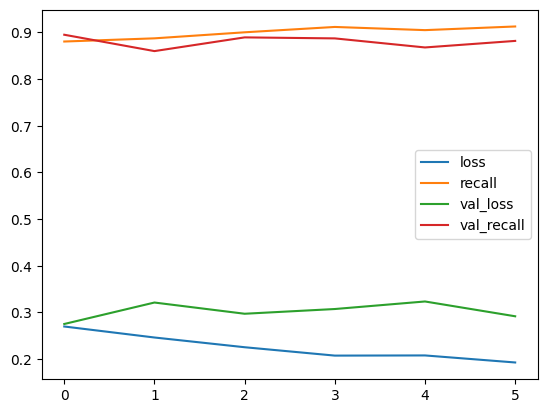

In [ ]:
model_loss.plot()

In [ ]:
model.evaluate(X_train, y_train)

567/567 [==============================] - 101s 179ms/step - loss: 0.2187 - recall: 0.9071


[0.21867763996124268, 0.9070927500724792]

In [ ]:
model.evaluate(X_test, y_test)

142/142 [==============================] - 26s 186ms/step - loss: 0.6440 - recall: 1.0000


[0.6440377235412598, 1.0]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

567/567 [==============================] - 101s 178ms/step
[[ 3056   225]
 [ 1378 13454]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.93      0.79      3281
           1       0.98      0.91      0.94     14832

    accuracy                           0.91     18113
   macro avg       0.84      0.92      0.87     18113
weighted avg       0.93      0.91      0.92     18113



In [ ]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

142/142 [==============================] - 26s 186ms/step
[[ 689  131]
 [ 390 3319]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.84      0.73       820
           1       0.96      0.89      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.87      0.83      4529
weighted avg       0.90      0.88      0.89      4529



142/142 [==============================] - 27s 189ms/step


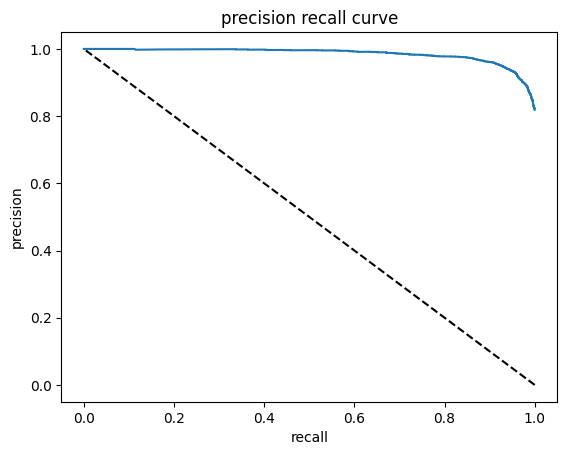

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba,)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.9853350288908239

##Scores without sample_weight

## Model Saving

In [ ]:
model.save('review_womensclothing.h5')

##Loading Model

In [ ]:
from tensorflow.keras.models import load_model
model_review = load_model('review_womensclothing.h5')

## Predicton

In [ ]:
review1 = "I really liked it, I recommend it to everyone."
review2 = "Great product, arrived the same day."
review3 = "I experienced a great disappointment, I couldn't associate this product with this brand."
review4 = "Indescribable with words."
review5 = "The design is great but the delivery was very late and the product was opened, really disappointing."
review6 = "Not at all as shown in the pictures."
review7 = "Bad reviews scared me but I didn't have any problems, thank you,."
review8 = "I have never encountered such a bad seller, I am canceling my order."
review9 = "A complete value for money product."
review10 = "It didn't turn out as I expected."
review11 = "Excellent, five stars."
review12 = "There is a problem with the product."
review13 = "The image quality of the television is very poor, last night we gathered with friends at home. We ate, drank, chatted. Then we watched the Turkey - England match on TV."
review14 = "It arrived in a short time like 1 day. And for this price, it's a great product, I recommend it. However, people with big hands may prefer the larger model, it's a medium-sized product. Thanks."
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [ ]:
tokens = tokenizer.texts_to_sequences(reviews)

In [ ]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(14, 107)

In [ ]:
predictions = (model_review.predict(tokens_pad) >0.5).astype("int")

1/1 [==============================] - 0s 111ms/step


In [ ]:
predictions

array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1]])

![image.png](attachment:image.png)

In [ ]:


# İncelemeleri içeren bir DataFrame oluşturma
df_reviews = pd.DataFrame({'review': reviews})

# DataFrame'i görüntüleme
df_reviews


,review
0,"I really liked it, I recommend it to everyone."
1,"Great product, arrived the same day."
2,"I experienced a great disappointment, I couldn..."
3,Indescribable with words.
4,The design is great but the delivery was very ...
5,Not at all as shown in the pictures.
6,Bad reviews scared me but I didn't have any p...
7,"I have never encountered such a bad seller, I ..."
8,A complete value for money product.
9,It didn't turn out as I expected.


In [ ]:
predictions = predictions.flatten()


In [ ]:
pred_df = pd.DataFrame({'recommend_prediction': predictions})

In [ ]:
pred_main= pd.concat([df_reviews, pred_df], axis=1)

In [ ]:
pred_main

,review,recommend_prediction
0,"I really liked it, I recommend it to everyone.",1
1,"Great product, arrived the same day.",1
2,"I experienced a great disappointment, I couldn...",0
3,Indescribable with words.,1
4,The design is great but the delivery was very ...,0
5,Not at all as shown in the pictures.,0
6,Bad reviews scared me but I didn't have any p...,0
7,"I have never encountered such a bad seller, I ...",0
8,A complete value for money product.,1
9,It didn't turn out as I expected.,0
